# Check the image examples

In [84]:
# Read dataset example
from huggingface_hub import hf_hub_download
import pandas as pd

df = pd.read_csv("hf://datasets/Codatta/Refined-TCGA-PRAD-Prostate-Cancer-Pathology-Dataset/dataset/PRAD/PRAD.csv")

sample_idx_in_csv = 6

print(df.slide_id[sample_idx_in_csv])
print(df.slide_name[sample_idx_in_csv])
print(len(df.slide_name))

202e9943-0192-434f-b2c0-96ef8a75ca4f
TCGA-V1-A9Z9-01Z-00-DX1.CB27F8C0-FADF-4010-904D-125FE17AE8B3.svs
138


In [86]:
# Check if the names of.svs and .geojson files match
from natsort import natsorted
from glob import glob
import openslide
import os
import matplotlib.pyplot as plt

img_dir_root = "/data/jjiang10/Data/ProstatePathology/WSIs/"  # + slide_id + slide_name
geojson_dir_root = "/data/jjiang10/Data/ProstatePathology/dataset/PRAD/"  # + slide_name.replace(".svs", ".geojson")

slide_name_list = natsorted(list(df.slide_name))

anno_name_list = glob(os.path.join(geojson_dir_root, "*.geojson"))
anno_name_list = natsorted([os.path.split(fn)[1] for fn in anno_name_list])

print("There are {} WSIs, and {} annotation files.".format(len(slide_name_list), len(anno_name_list)))

anno_fn_list = [anno_fn.replace(".geojson", "") for anno_fn in anno_name_list]
slide_fn_list = [slide_fn.replace(".svs", "") for slide_fn in slide_name_list]

diff = set(anno_fn_list) - set(slide_fn_list)
intersection = set(anno_fn_list).intersection(set(slide_fn_list))
print(len(anno_fn_list), len(slide_fn_list), len(diff), len(intersection)) 



There are 138 WSIs, and 99 annotation files.
99 138 0 99


## Install openslide
``` bash
conda activate your_env
conda install openslide 
conda install openslide-python
```

In [87]:

sample_idx_intersection = 0
slide_name = list(intersection)[sample_idx_intersection] + ".svs"
img_fn = glob(os.path.join(img_dir_root, "*", slide_name))[0]

# Get slide id from image name with full path
def get_slide_id(img_fn):
    slide_id = os.path.split(os.path.split(img_fn)[0])[1] # 
    return slide_id

# Get index with the tabel based on slide ID
def get_csv_index_from_slide_id(data_frame, slide_id):
    idx = data_frame[data_frame.slide_id == slide_id].index[0]
    return idx

slide_id = get_slide_id(img_fn)
print(slide_id, slide_name, img_fn)
geojson_fn = os.path.join(geojson_dir_root, slide_name.replace(".svs", ".geojson"))

down_sample_rate = 100
# Read image, down sample it, and show it
wsi_obj = openslide.OpenSlide(img_fn)


bb88dcbb-3468-40b9-8fe8-45ba00f7746f TCGA-G9-A9S7-01Z-00-DX1.E46D2A59-1B23-4841-B327-C9AAE176AD2D.svs /data/jjiang10/Data/ProstatePathology/WSIs/c38c17ab-f53a-4772-a99e-5126bbc52fa2/TCGA-G9-A9S7-01Z-00-DX1.E46D2A59-1B23-4841-B327-C9AAE176AD2D.svs


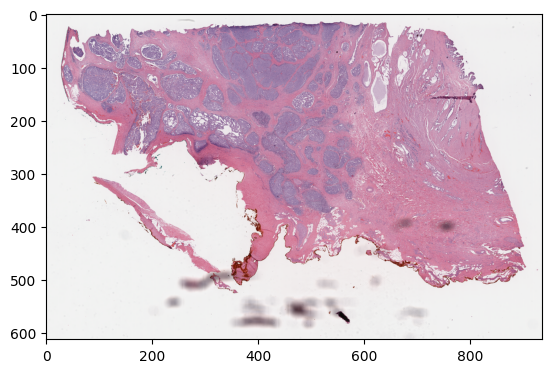

In [88]:
# get thumbnails from both WSIs for raw alignment
def get_thumbnails(wsi_obj, rescale_rate=100):
    wsi_w, wsi_h = wsi_obj.dimensions
    thumb_size_x = wsi_w / rescale_rate
    thumb_size_y = wsi_h / rescale_rate
    thumbnail = wsi_obj.get_thumbnail([thumb_size_x, thumb_size_y]).convert("RGB")
    return  thumbnail


thumbnail = get_thumbnails(wsi_obj, down_sample_rate)
plt.imshow(thumbnail)


/data/jjiang10/Data/ProstatePathology/dataset/PRAD/TCGA-G9-A9S7-01Z-00-DX1.E46D2A59-1B23-4841-B327-C9AAE176AD2D.geojson


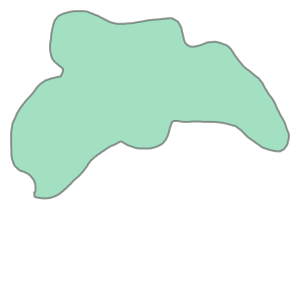

In [89]:
## install the python package to read .geojson file 
### pip install geopandas
# Read .geojson file (ROI annotation)
import geopandas as gpd  
print(geojson_fn)
roi_data = gpd.read_file(geojson_fn)
roi_data.geometry[0]


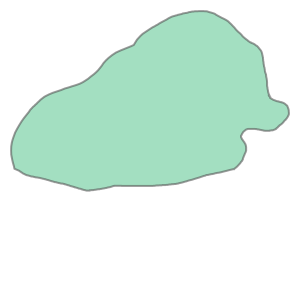

In [81]:
roi_data.geometry[1]

In [90]:
list(roi_data.geometry[1].exterior.coords)

[(32373.0, 1774.0),
 (32544.0, 1945.0),
 (32587.0, 2201.0),
 (32672.0, 2329.0),
 (32672.0, 2585.0),
 (32715.0, 2798.0),
 (32715.0, 3310.0),
 (32672.0, 3438.0),
 (32672.0, 3481.0),
 (32629.0, 3566.0),
 (32544.0, 3694.0),
 (32544.0, 3737.0),
 (32501.0, 3822.0),
 (32501.0, 3865.0),
 (32416.0, 3950.0),
 (32416.0, 4121.0),
 (32373.0, 4121.0),
 (32373.0, 4249.0),
 (32288.0, 4334.0),
 (32288.0, 4462.0),
 (32245.0, 4505.0),
 (32245.0, 4633.0),
 (32160.0, 4633.0),
 (32160.0, 4761.0),
 (32117.0, 4846.0),
 (32117.0, 4889.0),
 (32032.0, 4974.0),
 (32032.0, 5017.0),
 (31989.0, 5102.0),
 (31904.0, 5145.0),
 (31861.0, 5273.0),
 (31776.0, 5358.0),
 (31733.0, 5486.0),
 (31648.0, 5614.0),
 (31605.0, 5657.0),
 (31520.0, 5742.0),
 (31477.0, 5785.0),
 (31392.0, 5870.0),
 (31349.0, 5998.0),
 (31264.0, 6041.0),
 (31221.0, 6126.0),
 (31221.0, 6169.0),
 (31136.0, 6169.0),
 (31136.0, 6254.0),
 (31093.0, 6297.0),
 (31008.0, 6382.0),
 (31008.0, 6425.0),
 (30965.0, 6510.0),
 (30880.0, 6553.0),
 (30837.0, 6638.0),


In [91]:
import json
from shapely.geometry import shape

# Read GeoJSON file
with open(geojson_fn) as f:
    data = json.load(f)

# Access the geometry
for feature in data["features"]:
    geom = shape(feature["geometry"])
    print(geom)
coordinates = list(feature["geometry"]['coordinates'])


POLYGON ((32595 3777, 32637 3777, 32669 3852, 32691 3926, 32691 4172, 32680 4364, 32627 4566, 32531 4780, 32339 5014, 32275 5078, 32200 5142, 32147 5196, 32008 5260, 31891 5324, 31795 5366, 31688 5398, 31560 5430, 31411 5526, 31315 5612, 31219 5708, 31112 5804, 31048 5932, 30984 6092, 30920 6284, 30867 6508, 30856 6764, 30856 7052, 30835 7340, 30835 8364, 30867 8588, 30931 8972, 30963 9110, 31037 9270, 31123 9430, 31187 9580, 31229 9708, 31293 9836, 31453 10102, 31549 10252, 31667 10412, 31955 10774, 32125 10966, 32285 11126, 32573 11468, 32733 11702, 32787 11788, 33075 12076, 33277 12214, 33341 12246, 33395 12300, 33437 12332, 33491 12342, 33565 12374, 33661 12406, 33779 12438, 33885 12492, 33971 12502, 34035 12502, 34099 12524, 34173 12556, 34387 12598, 34429 12620, 34483 12620, 34515 12630, 34547 12630, 34579 12652, 34611 12652, 34611 12662, 34621 12684, 34643 12694, 34653 12748, 34685 12790, 34739 12876, 34749 12940, 34771 12972, 34781 13004, 34781 13068, 34803 13100, 34803 13196, 

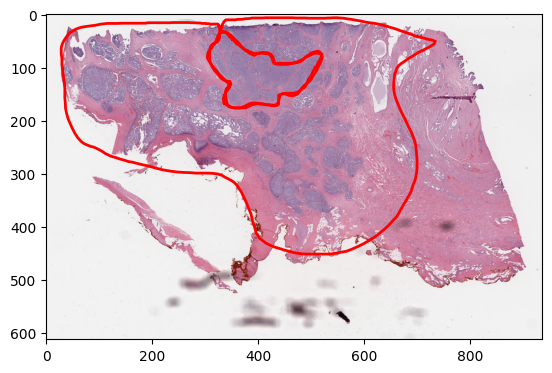

In [92]:
# Show image thumbnail and add the ROI annotations to the plot
import matplotlib.patches as patches
import numpy as np

fig, ax = plt.subplots()
ax.imshow(thumbnail)
# roi_data.geometry[0]["coordinates"]
for g in roi_data.geometry:
    coords = np.array(g.exterior.coords, dtype=float)/down_sample_rate
    polygon_vertices = list(coords)
    # print(np.array(polygon_vertices))
    polygon = patches.Polygon(polygon_vertices, closed=True, fill=False, edgecolor='red', linewidth=2)

    ax.add_patch(polygon)

plt.show()

In [93]:

slide_id = get_slide_id(img_fn)
sample_idx_in_csv = get_csv_index_from_slide_id(df, slide_id)

In [97]:
# Check if the index is correct
new_slide_id = df.slide_id[sample_idx_in_csv]
new_slide_name = df.slide_name[sample_idx_in_csv]
print(slide_id, new_slide_id)
print(slide_name, new_slide_name)

# print text annotations
print(df.diagnosis[sample_idx_in_csv])
print(df.label[sample_idx_in_csv])

c38c17ab-f53a-4772-a99e-5126bbc52fa2 c38c17ab-f53a-4772-a99e-5126bbc52fa2
TCGA-G9-A9S7-01Z-00-DX1.E46D2A59-1B23-4841-B327-C9AAE176AD2D.svs TCGA-G9-A9S7-01Z-00-DX1.E46D2A59-1B23-4841-B327-C9AAE176AD2D.svs
This slide contains predominately Gleason Grade 4 tumor, characterized by glandular fusion or cribriform structure, alongside denser regions of Gleason Grade 5 tumor, where glandular differentiation is absent.
Gleason Score 4+5
